# Problem 4-3
Group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

## Installation
is done via conda as follows
```bash
conda env create -f environment.yaml
conda activate complex_network
jupyter lab # opens jupyter lab in a browser window
```

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph
import scipy.optimize
import powerlaw

from pathlib import Path

%config InlineBackend.figure_format='retina'

In [3]:
# paths
path_data = Path("/Users/lucasmueller/Documents/Projects/complex_network/facebook-links.txt")

## Preperation

In [4]:
df = pd.read_csv(path_data, sep="\t", names=["source", "target", "timestamp"])
df = df[["source", "target"]]

# make graph pythonic
df = df - 1

In [5]:
df

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1545681,21168,12887
1545682,21168,18659
1545683,48808,24064
1545684,48808,29257


In [6]:
# add an edge which neglects the order (by sorting it)
df['edge'] = df.apply(lambda r: tuple(sorted((r.source, r.target))), axis=1)

# drop duplicates
df = df.drop_duplicates('edge')
df

,source,target,edge
0,0,1,"(0, 1)"
1,0,2,"(0, 2)"
2,0,3,"(0, 3)"
3,0,4,"(0, 4)"
4,0,5,"(0, 5)"
...,...,...,...
1545556,31970,13389,"(13389, 31970)"
1545643,18750,19388,"(18750, 19388)"
1545650,18750,27761,"(18750, 27761)"
1545654,18750,17545,"(17545, 18750)"


In [7]:
g = igraph.Graph()

g.add_vertices(list(set(df.source.to_list()) | set(df.target.to_list())))
g.add_edges(df.edge.to_list())

## Tasks

In [8]:
# diameter
g.diameter()

15

In [17]:
# degree
arg_degree = np.argmax(g.vs.degree())

print(f"highest degree: {g.vs.degree()[arg_degree]} (ID: {arg_degree + 1})")

highest degree: 1098 (ID: 2332)


In [65]:
# number of triangles
len(g.cliques(3, 3))

3501542


In [134]:
# global clustering coefficient
print(f"{g.transitivity_undirected():.2f}")

0.15


In [135]:
# power-law exponent of degree distribution
def model(k, gamma, c):
    return c * k ** (-gamma)

p_opt, p_cov = scipy.optimize.curve_fit(model, deg[:, 0], deg[:, -1] / len(g.vs))

In [136]:
# actual vs fitted degree distribution
deg = list(g.degree_distribution().bins())
deg = np.array(deg)#[:, [0, -1]]

# powerlaw
fit = powerlaw.Fit(g.vs.degree())

# model function
k = np.linspace(1, 1000, 1000)
m = model(k, *p_opt)

Calculating best minimal value for power law fit


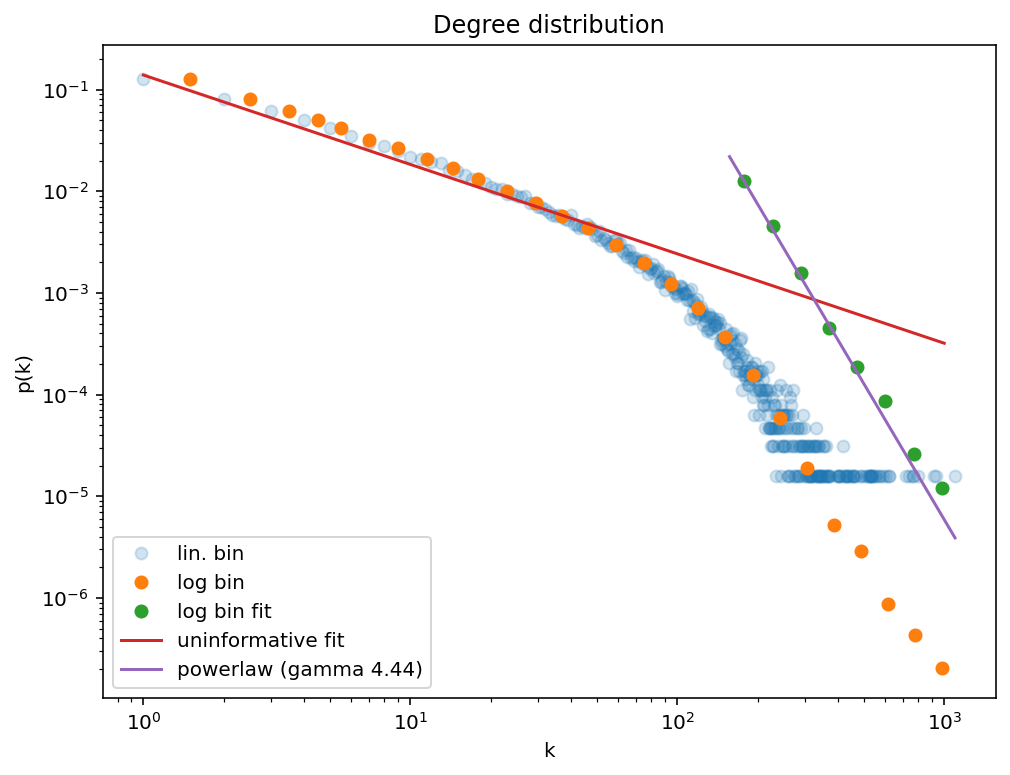

In [137]:
plt.figure(figsize=(8, 6))

plt.plot(deg[:, 0], deg[:, -1] / len(g.vs), 'o', alpha=0.2)  # actual data
powerlaw.plot_pdf(g.vs.degree(), marker='o', linestyle='none')
fit.plot_pdf(marker='o', linestyle='none')
plt.plot(k, m)  # uninformative fit
fit.power_law.plot_pdf()

plt.xscale('log')
plt.yscale('log')

plt.xlabel('k')
plt.ylabel('p(k)')

plt.legend(["lin. bin", "log bin", "log bin fit", "uninformative fit", f"powerlaw (gamma {fit.alpha:.2f})"])
plt.title("Degree distribution")

plt.show()